<a href="https://colab.research.google.com/github/gmargonato/ML_Projects/blob/main/EDA_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLORATORY DATA ANALYSIS

**Dataset:** https://huggingface.co/datasets/alfredodeza/wine-ratings


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Connection to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Data Acquisition
df = pd.read_csv('/content/drive/MyDrive/ML Projects/LEMAY.AI Interview/3) EXPLORATORY DATA ANALYSIS/train.csv', sep=',')
df.tail()


,name,region,variety,rating,notes
32775,Lewis Cellars Syrah Ethan's Blend 2005,California,Red Wine,92.0,"Now 7 years old, Alec's younger brother Ethan ..."
32776,Lewis Cellars Syrah Ethan's Blend 2014,California,Red Wine,93.0,"Born in 2000, everything about Ethan and his n..."
32777,Lewis Cellars Syrah Ethan's Blend 2009,California,Red Wine,94.0,"Positioned between brothers, Alec and Mason, E..."
32778,Lexington Apex Red 2011,"Santa Cruz Mountains, California",Red Wine,91.0,"Blend: 99% Cabernet Sauvignon, 1% Merlot"
32779,Lexington Gist Ranch Cabernet Sauvignon 2011,"Santa Cruz Mountains, California",Red Wine,91.0,"Blend: 80% Cabernet Sauvignon, 20% Merlot"


name         0
region       3
variety    358
rating       0
notes        0
dtype: int64

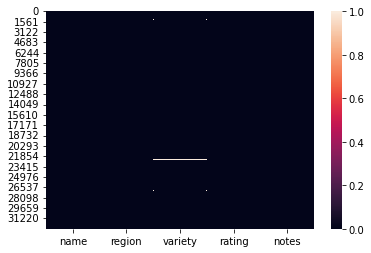

In [ ]:
# Checking for missing values
sns.heatmap(df.isna())
pd.isnull(df).sum()

In [ ]:
# Drop rows containing missing data
df = df.dropna()

# Year

Analyze the year of production of your samples

In [ ]:
# Let's extract the Year out of the name of the wine
# It will first check if the last 4 characters of the name are actually digits

df.loc[df['name'].str[-4:].str.isdigit(), 'Year'] = df['name'].str[-4:]
df.tail()

,name,region,variety,rating,notes,Year
32775,Lewis Cellars Syrah Ethan's Blend 2005,California,Red Wine,92.0,"Now 7 years old, Alec's younger brother Ethan ...",2005
32776,Lewis Cellars Syrah Ethan's Blend 2014,California,Red Wine,93.0,"Born in 2000, everything about Ethan and his n...",2014
32777,Lewis Cellars Syrah Ethan's Blend 2009,California,Red Wine,94.0,"Positioned between brothers, Alec and Mason, E...",2009
32778,Lexington Apex Red 2011,"Santa Cruz Mountains, California",Red Wine,91.0,"Blend: 99% Cabernet Sauvignon, 1% Merlot",2011
32779,Lexington Gist Ranch Cabernet Sauvignon 2011,"Santa Cruz Mountains, California",Red Wine,91.0,"Blend: 80% Cabernet Sauvignon, 20% Merlot",2011


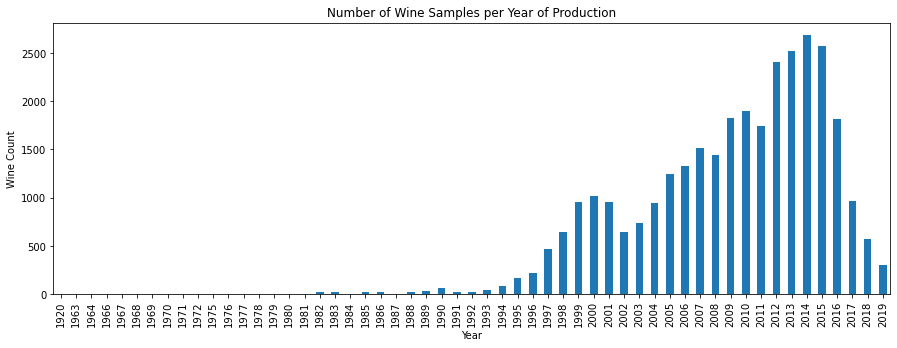

In [ ]:
# Count the number of occurrences of each year
year_counts = df['Year'].value_counts()
year_counts = year_counts.sort_index()

# Plot a bar chart
plt.figure(figsize=(15, 5))
year_counts.plot.bar()
plt.title('Number of Wine Samples per Year of Production')
plt.xlabel('Year')
plt.ylabel('Wine Count')
plt.show()

# Rating

Understand how our sample wines are rated

In [ ]:
df['rating'].describe() 

count    32421.000000
mean        91.180346
std          2.189190
min         85.000000
25%         90.000000
50%         91.000000
75%         92.000000
max         99.000000
Name: rating, dtype: float64

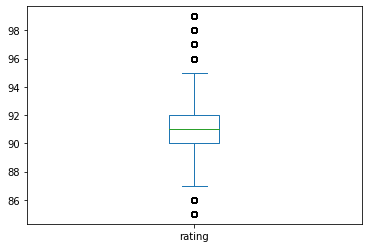

In [ ]:
# Plot a box plot of the 'rating' column
df['rating'].plot.box()
plt.show()


Wines rated above 96 or below 86 are considered **outliers**, while
- Q3:92
- Q2 *(median)*: 91
- Q1: 90

Where 87 and 95 are the minimum and maximum values in the data, respectively

# Region

Analyze the region of wines rated above mean (91)

In [ ]:
# 1) Filter the DataFrame by the 'rating' column
df_filtered = df.loc[df['rating'] >= 91]

In [ ]:
# 2) Select the top 10 regions
region_counts = df_filtered['region'].value_counts()
top_regions = region_counts.nlargest(10)

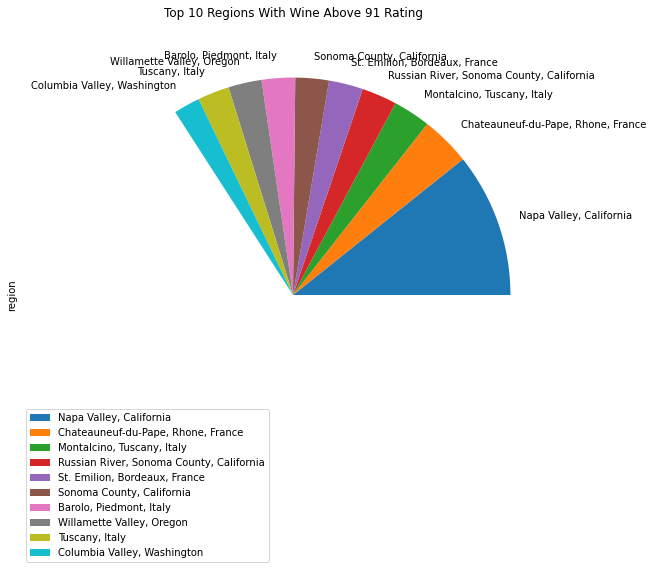

In [ ]:
# Pie-char

total_regions = region_counts.sum()
top_regions_share = top_regions / total_regions
top_regions_share.plot.pie(figsize=(10, 10))

plt.title('Top 10 Regions With Wine Above 91 Rating')
plt.legend(loc='best')

plt.show()


Most above-average rated wines are produced either in the U.S. (California, Oregon, Washington), France or Italy. 

# Notes

Create a word-cloud for the user's notes

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Generate the word cloud
text = ' '.join(df['notes'].tolist())
wordcloud = WordCloud(background_color="white").generate(text)

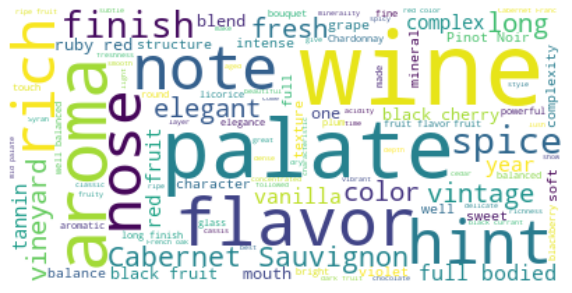

In [ ]:
# Plot the word cloud
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
plt.show()

*Note: I decided to keep stopwords since they didn't impact drastically the cloud*